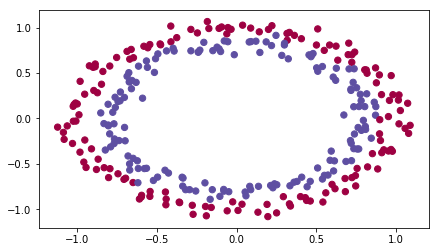

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

In [3]:
def model(X, Y, num_iterations=15000, learning_rate=0.01, print_cost=True, initialization='he'):
    
    grads = {}
    costs = []
    
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
    elif initialization == 'xe':
        parameters = initialize_parameters_xe(layers_dims)
    
    for i in range(num_iterations):
        
        AL, cache = forward_propagation(X, parameters)
        
        cost = compute_loss(AL, Y)
        
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost at {}th iteration: {}".format(i, cost))
        
        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
    plt.plot(costs)
    plt.xlabel("No. of iterations")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters

In [4]:
def initialize_parameters_zeros(layers_dims):
    
    parameters = {}
    
    for i in range(1, len(layers_dims)):
            
        parameters["W" + str(i)] = np.zeros((layers_dims[i], layers_dims[i-1]))
        parameters["b" + str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

In [5]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost at 0th iteration: 0.6931471805599453
Cost at 1000th iteration: 0.6931471805599453
Cost at 2000th iteration: 0.6931471805599453
Cost at 3000th iteration: 0.6931471805599453
Cost at 4000th iteration: 0.6931471805599453
Cost at 5000th iteration: 0.6931471805599453
Cost at 6000th iteration: 0.6931471805599453
Cost at 7000th iteration: 0.6931471805599453
Cost at 8000th iteration: 0.6931471805599453
Cost at 9000th iteration: 0.6931471805599453
Cost at 10000th iteration: 0.6931471805599455
Cost at 11000th iteration: 0.6931471805599453
Cost at 12000th iteration: 0.6931471805599453
Cost at 13000th iteration: 0.6931471805599453
Cost at 14000th iteration: 0.6931471805599453


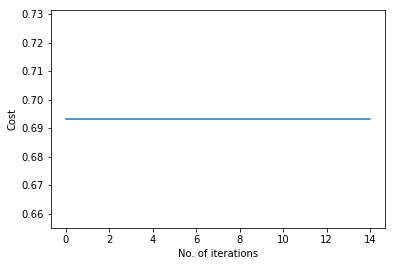

Predicting on train data
Accuracy: 0.5
Predicting on test data
Accuracy: 0.5


In [6]:
parameters = model(train_X, train_Y, initialization='zeros')
print("Predicting on train data")
prediction_train = predict(train_X, train_Y, parameters)
print("Predicting on test data")
prediction_test = predict(test_X, test_Y, parameters)

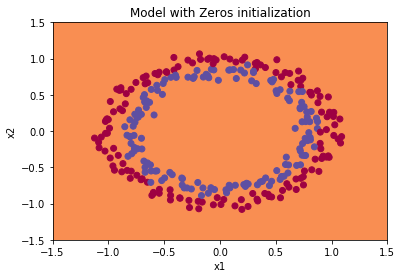

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [8]:
def initialize_parameters_random(layers_dims):
    
    parameters = {}
    np.random.seed(3)
    
    for l in range(1, len(layers_dims)):
        
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

In [9]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost at 0th iteration: inf


/home/jovyan/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/jovyan/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost at 1000th iteration: 0.6247924745506072
Cost at 2000th iteration: 0.5980258056061102
Cost at 3000th iteration: 0.5637539062842213
Cost at 4000th iteration: 0.5501256393526495
Cost at 5000th iteration: 0.5443826306793814
Cost at 6000th iteration: 0.5373895855049121
Cost at 7000th iteration: 0.47157999220550006
Cost at 8000th iteration: 0.39770475516243037
Cost at 9000th iteration: 0.3934560146692851
Cost at 10000th iteration: 0.3920227137490125
Cost at 11000th iteration: 0.38913700035966736
Cost at 12000th iteration: 0.3861358766546214
Cost at 13000th iteration: 0.38497629552893475
Cost at 14000th iteration: 0.38276694641706693


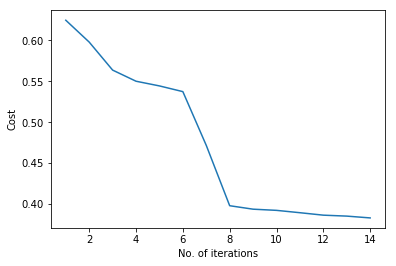

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [10]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

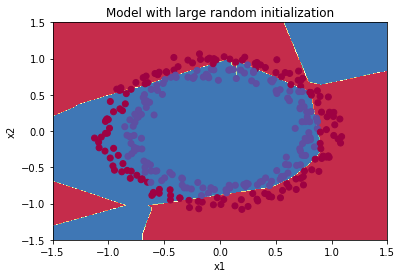

In [11]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [12]:
def initialize_parameters_he(layers_dims):
    
    parameters = {}
    np.random.seed(3)
    
    for l in range(1, len(layers_dims)):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [13]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost at 0th iteration: 0.8830537463419761
Cost at 1000th iteration: 0.6879825919728063
Cost at 2000th iteration: 0.6751286264523371
Cost at 3000th iteration: 0.6526117768893805
Cost at 4000th iteration: 0.6082958970572938
Cost at 5000th iteration: 0.5304944491717495
Cost at 6000th iteration: 0.4138645817071794
Cost at 7000th iteration: 0.3117803464844441
Cost at 8000th iteration: 0.23696215330322562
Cost at 9000th iteration: 0.1859728720920684
Cost at 10000th iteration: 0.15015556280371808
Cost at 11000th iteration: 0.12325079292273551
Cost at 12000th iteration: 0.09917746546525937
Cost at 13000th iteration: 0.08457055954024283
Cost at 14000th iteration: 0.07357895962677366


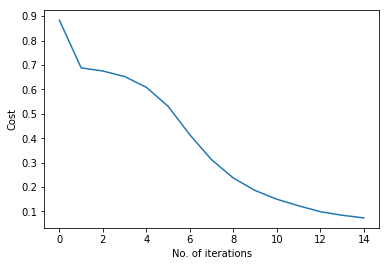

Accuracy: 0.9933333333333333
Accuracy: 0.96


In [14]:
parameters = model(train_X, train_Y, initialization='he')
prediction_train = predict(train_X, train_Y, parameters)
prediction_test = predict(test_X, test_Y, parameters)

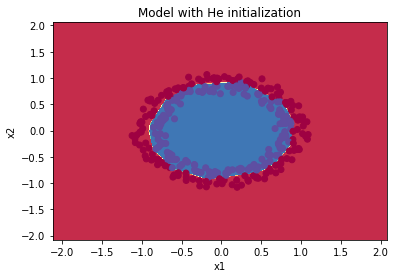

In [15]:
plt.title("Model with He initialization")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [16]:
def initialize_parameters_xe(layers_dims):
    
    parameters = {}
    
    for i in range(1, len(layers_dims)):
        parameters["W" + str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1]) * np.sqrt(1 / layers_dims[i-1])
        parameters["b" + str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

Cost at 0th iteration: 0.7124488505443796
Cost at 1000th iteration: 0.6951503955086485
Cost at 2000th iteration: 0.691963286016815
Cost at 3000th iteration: 0.6893361023811949
Cost at 4000th iteration: 0.6867158647895208
Cost at 5000th iteration: 0.6833067019044281
Cost at 6000th iteration: 0.6763355132519581
Cost at 7000th iteration: 0.6590617323618233
Cost at 8000th iteration: 0.6161968848538164
Cost at 9000th iteration: 0.5372767935605973
Cost at 10000th iteration: 0.41737739039294913
Cost at 11000th iteration: 0.2886949764483866
Cost at 12000th iteration: 0.19664876183393454
Cost at 13000th iteration: 0.1410962007925415
Cost at 14000th iteration: 0.10779392479167696


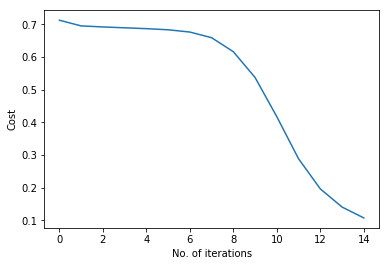

On the training set: 
Accuracy: 0.9933333333333333
On the test set: 
Accuracy: 0.95


In [17]:
parameters = model(train_X, train_Y, initialization='xe')
print("On the training set: ")
prediction_train = predict(train_X, train_Y, parameters)
print("On the test set: ")
prediction_test = predict(test_X, test_Y, parameters)

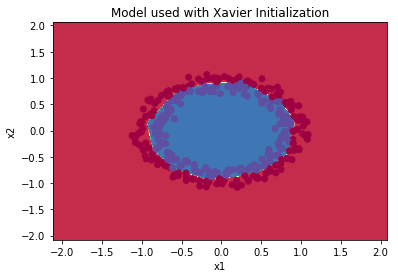

In [18]:
plt.title("Model used with Xavier Initialization")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)